# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Putranda Bagus Cahya Lumintang
- Email: putranda.bagus@gmail.com
- Id Dicoding: putranda_bagus

## Menentukan Pertanyaan Bisnis

- Apa tipe pembayaran yang paling banyak digunakan?
- Berapa jumlah (count) rating tiap nilai?
- Apa daerah dengan customer terbanyak?
- produk apalah yang paling laku?

## Menyiapkan semua library yang dibutuhkan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import calendar

## Data Wrangling

### Gathering Data

In [3]:
customer_data = pd.read_csv('./Datasets/olist_customers_dataset.csv')
geo_data = pd.read_csv('./Datasets/olist_geolocation_dataset.csv')
order_items_data = pd.read_csv('./Datasets/olist_order_items_dataset.csv')
order_payments_data = pd.read_csv('./Datasets/olist_order_payments_dataset.csv')
order_reviews_data = pd.read_csv('./Datasets/olist_order_reviews_dataset.csv')
orders_data = pd.read_csv('./Datasets/olist_orders_dataset.csv')
products_data = pd.read_csv('./Datasets/olist_products_dataset.csv')
sellers_data = pd.read_csv('./Datasets/olist_sellers_dataset.csv')
product_category_data = pd.read_csv('./Datasets/product_category_name_translation.csv')

### Assessing Data

#### mengambil data seperti:
- 5 data teratas
- informasi kolom
- deskripsi statistik singkat (mean, iqr, dll.)
- jumlah data yang kosong di tiap kolom
- jumlah data duplikat (khusus sebagian tabel)

- Data Pelanggan (Customer)

In [70]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [71]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [72]:
customer_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [73]:
customer_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [74]:
customer_data.duplicated().sum()

0

- Data posisi pengguna (Geolocation)

In [75]:
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [76]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [77]:
geo_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [78]:
geo_data.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

- Data Barang yang dipesan (Order Items)

In [79]:
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [80]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [81]:
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [82]:
order_items_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

- Data Pembayaran Pemesanan (Order Payments)

In [83]:
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [84]:
order_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [85]:
order_payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [86]:
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

- Data Review Pemesanan (Order Reviews)

In [87]:
order_reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [88]:
order_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [89]:
order_reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [90]:
order_reviews_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Data Pemesanan (Orders)

In [91]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [92]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [93]:
orders_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,2f39452424e1f94e150ebb634483439a,8d1eb0233a90478bafc36d66f468de9c,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [94]:
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Data Produk (Products)

In [95]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [96]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [97]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [98]:
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- Data Penjual (Sellers)

In [99]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [100]:
sellers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [101]:
sellers_data.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [102]:
sellers_data.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [103]:
sellers_data.duplicated().sum()

0

- Data Terjemahan Kategori Produk (Product Category Translation)

In [104]:
product_category_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [105]:
product_category_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [106]:
product_category_data.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,tablets_impressao_imagem,fashion_bags_accessories
freq,1,1


In [107]:
product_category_data.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [108]:
product_category_data.duplicated().sum()

0

### Cleaning Data

#### Tabel Customers

In [4]:
# mengubah tipe data kota customer menjadi string
customer_data['customer_city'] = customer_data['customer_city'].astype(str)
# kapitalisasi kota customer
customer_data['customer_city'] = customer_data['customer_city'].str.title()

#### Tabel Order Items

In [5]:
# mengubah data tanggal order items menjadi data datetime
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])

#### Tabel Order Payments

In [36]:
# mengubah tipe data tipe pembayaran menjadi string
order_payments_data['payment_type'] = order_payments_data['payment_type'].astype(str)

# menghapus underskor pada nama tipe pembayaran
order_payments_data['payment_type'] = order_payments_data['payment_type'].str.replace('_', ' ')

# kapitalisasi tipe pembayaran
order_payments_data['payment_type'] = order_payments_data['payment_type'].str.title()

#### Tabel Order Review

In [6]:
# mengisi data order review yang kosong dengan "No Title"
order_reviews_data['review_comment_title'].fillna('No Title', inplace=True)

# mengisi data order review yang kosong dengan "No Message"
order_reviews_data['review_comment_message'].fillna('No Message', inplace=True)

# mengubah data tanggal order review menjadi data datetime
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'])
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'])

#### Tabel Orders

In [7]:
# mengubah data tanggal order menjadi data datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])

## Exploratory Data Analysis (EDA)

In [146]:
# menghitung tipe pembayaran terbanyak
order_payments_data['payment_type'].value_counts().sort_values(ascending=False)

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [147]:
# menghitung jumlah counts review
order_reviews_data['review_score'].value_counts().sort_values(ascending=False)

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [148]:
# menghitung daerah dengan customer terbanyak?
customer_data.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
Sao Paulo         15540
Rio De Janeiro     6882
Belo Horizonte     2773
Brasilia           2131
Curitiba           1521
                  ...  
Ibiara                1
Rio Espera            1
Rio Dos Indios        1
Rio Dos Cedros        1
Lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [163]:
# menghitung jumlah pembayaran produk terbanyak
order_product = pd.merge(orders_data, order_items_data, on='order_id')
order_product = pd.merge(order_product, order_payments_data, on='order_id')
order_product = pd.merge(order_product, products_data, on='product_id')
order_product = pd.merge(order_product, product_category_data, on='product_category_name')

order_product.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           1712553.67
health_beauty            1657373.12
computers_accessories    1585330.45
furniture_decor          1430176.39
watches_gifts            1429216.68
sports_leisure           1392127.56
housewares               1094758.13
auto                      852294.33
garden_tools              838280.75
cool_stuff                779698.00
Name: payment_value, dtype: float64

In [169]:
# bagaimana review layanan dari customer dari bulan ke bulan?
order_reviews_data['review_month'] = order_reviews_data['review_answer_timestamp'].dt.month
order_reviews_data.groupby('review_month')['review_score'].mean()

review_month
1     4.053160
2     4.064309
3     3.828878
4     3.919832
5     4.160687
6     4.156849
7     4.245512
8     4.213998
9     4.210163
10    4.181222
11    4.090046
12    3.936894
Name: review_score, dtype: float64

## Visualization & Explanatory Analysis

### Apa tipe pembayaran yang paling banyak digunakan?

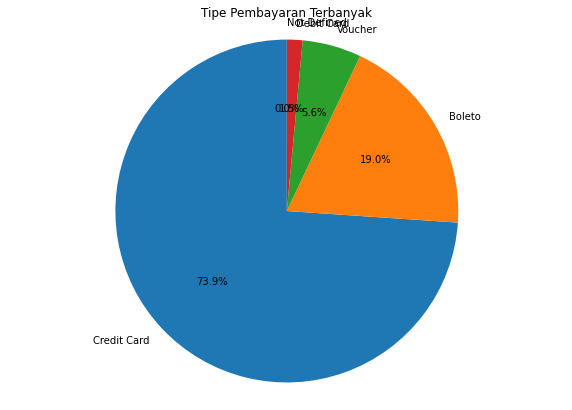

In [42]:
# menghitung tipe pembayaran terbanyak
order_payments_data['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 5))

plt.ylabel('')
plt.axis('equal')  # Untuk memastikan lingkaran terlihat bulat
plt.title('Tipe Pembayaran Terbanyak')
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10, 7)
plt.show()

### bagaimana review layanan dari customer dari bulan ke bulan?

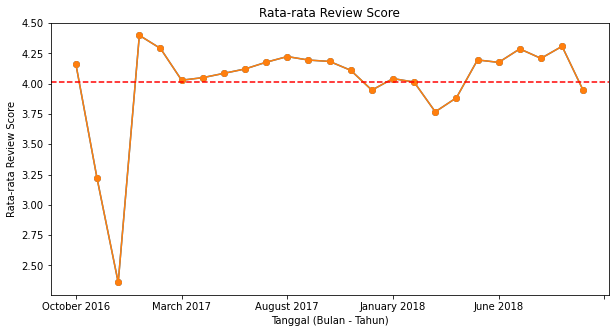

In [31]:
# Bagian kode yang Anda miliki
order_reviews_data['review_month'] = order_reviews_data['review_answer_timestamp'].dt.month
order_reviews_data['review_year'] = order_reviews_data['review_answer_timestamp'].dt.year

# Filter data berdasarkan tanggal awal hingga tanggal terbaru
start_date = order_reviews_data['review_answer_timestamp'].min()
end_date = order_reviews_data['review_answer_timestamp'].max()

filtered_data = order_reviews_data[
    (order_reviews_data['review_answer_timestamp'] >= start_date) &
    (order_reviews_data['review_answer_timestamp'] <= end_date)
]

# Group dan hitung rata-rata review score per bulan dan tahun
monthly_mean = filtered_data.groupby(['review_year', 'review_month'])['review_score'].mean()

# Buat label untuk sumbu x dengan format "<nomor_bulan> <tahun>"
monthly_mean.index = monthly_mean.index.map(lambda x: f"{calendar.month_name[x[1]]} {x[0]}")

# Hitung rata-rata keseluruhan
overall_mean = monthly_mean.mean()

# Plotting sebagai grafik garis
plt.figure(figsize=(10, 5))
monthly_mean.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Tanggal (Bulan - Tahun)')
plt.ylabel('Rata-rata Review Score')
plt.title('Rata-rata Review Score')

# garis rata-rata
ax = monthly_mean.plot(kind='line', marker='o', linestyle='-')
ax.axhline(y=overall_mean, color='r', linestyle='--', label=f'Rata-rata Keseluruhan ({overall_mean:.2f})')

plt.xticks(rotation=0)
plt.show()

## Conclusion

- Conclusion pertanyaan 1
- conclusion pertanyaan 2